In [1]:
from google.cloud import bigquery
from google.cloud.bigquery import dbapi
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [23]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/grolleau/Desktop/github repos/Cost variability/grolleau_application_default_credentials.json'
os.environ['GCLOUD_PROJECT'] = 'som-nero-phi-jonc101-secure'

# Instantiate a client object so you can make queries
client = bigquery.Client()

# Create a connexion to that client
conn = dbapi.connect(client);
query = """SELECT sec_cost.*, diag.dx_name
FROM
`som-nero-phi-jonc101-secure.proj_IP_variation.matched_drg_cost_adms` AS sec_cost JOIN
`som-nero-phi-jonc101.shc_core_2023.lpch_diagnosis` AS diag ON diag.anon_id = sec_cost.anon_id
WHERE
ABS(DATE_DIFF(DATE(diag.start_date_jittered), DATE(sec_cost.adm_date_jittered), DAY)) < 10
"""
df = pd.read_sql_query(query, conn)

/var/folders/g9/0793jttd561450xdx_49841c0000gq/T/ipykernel_15649/4008036972.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [24]:
print('The cost dataset has:')
print(f"{df.shape[0]} rows")
print(f"{df.shape[1]} colums")

The cost dataset has:
28414 rows
23 colums


In [25]:
f'The cost dataset is {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} Mo'

'The cost dataset is 21.30 Mo'

In [26]:
df['ln_cost_adj'] = np.log(df.Cost_Adj)

In [33]:
diag_count_dic = df['dx_name'].value_counts().to_dict()
df['diag_count'] = df['dx_name'].map(diag_count_dic)

In [38]:
diag_count_dic

{'Pregnancy': 548,
 'Single live birth': 374,
 'Other specified diseases and conditions complicating pregnancy, childbirth and the puerperium': 282,
 'Allergy status to unspecified drugs, medicaments and biological substances': 238,
 'Maternal care for unspecified type scar from previous cesarean delivery': 232,
 'Other immediate postpartum hemorrhage': 228,
 'Abnormality in fetal heart rate and rhythm complicating labor and delivery': 226,
 'Laboratory test': 188,
 'Maternal care for other known or suspected poor fetal growth, third trimester, not applicable or unspecified': 166,
 'Adverse effect of antineoplastic and immunosuppressive drugs, initial encounter': 164,
 'Supervision of elderly multigravida, third trimester': 152,
 'Placenta accreta, third trimester': 150,
 'Supervision of high risk pregnancy in third trimester': 140,
 'Supervision of high risk pregnancy, unspecified, third trimester': 140,
 'Diseases of the circulatory system complicating pregnancy, third trimester': 13

<Axes: xlabel='dx_name', ylabel='ln_cost_adj'>

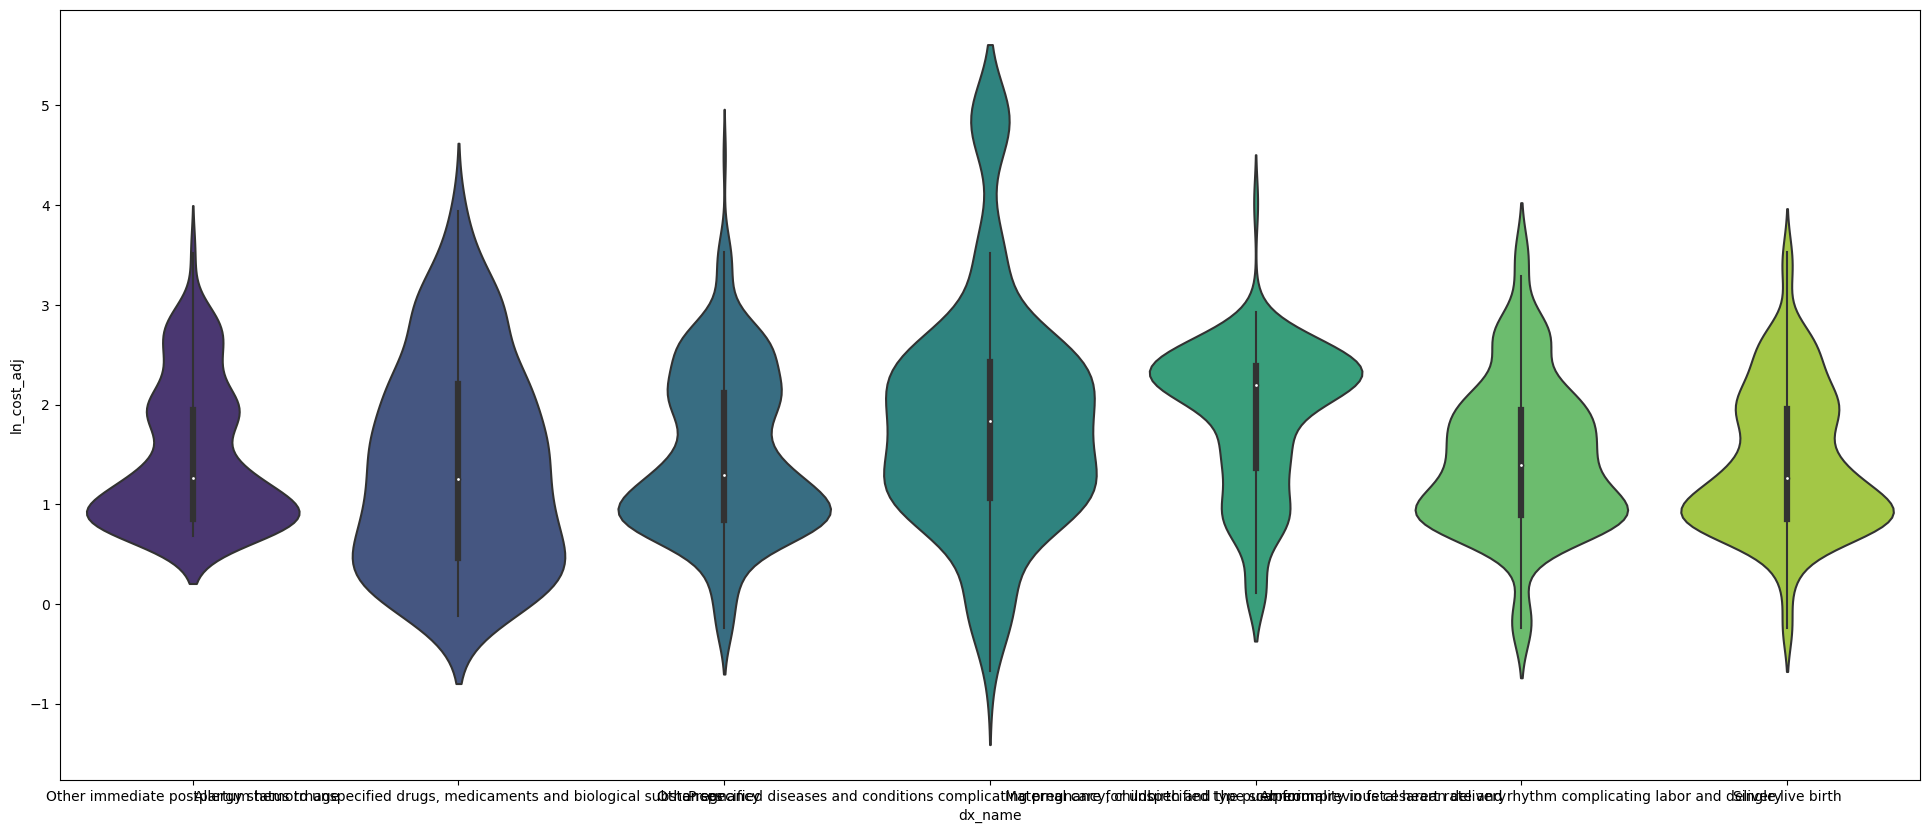

In [35]:
df_diag100 = df[df['diag_count'] > 200]

plt.figure(figsize=(24, 10))
sns.violinplot(x='dx_name', y='ln_cost_adj', data=df_diag100, scale='width', palette='viridis')